# STAT 538A: Generalized Linear Models 


# <font color=red> Activity 2: Logistic Regression

Let's take an initial look at data

Run the cells below to upload packages and data

In [1]:
options(repr.plot.width=12, repr.plot.height=8)

library(tidyverse)
library(repr)
library(digest)
library(broom)

install.packages("glmbb")
library(glmbb)

# to install new packages
install.packages("ISLR")
library(ISLR)
str(Default)

── Attaching packages ─────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Installing package into 'C:/Users/chunq/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'glmbb' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\chunq\AppData\Local\Temp\RtmpikAEhl\downloaded_packages


Installing package into 'C:/Users/chunq/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'ISLR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\chunq\AppData\Local\Temp\RtmpikAEhl\downloaded_packages
'data.frame':	10000 obs. of  4 variables:
 $ default: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ student: Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 1 2 1 1 ...
 $ balance: num  730 817 1074 529 786 ...
 $ income : num  44362 12106 31767 35704 38463 ...


In [2]:
Default <- Default %>% 
  mutate(default = if_else(default == "Yes", 1, 0))
head(Default)

,default,student,balance,income
,<dbl>,<fct>,<dbl>,<dbl>
1,0,No,729.5265,44361.625
2,0,Yes,817.1804,12106.135
3,0,No,1073.5492,31767.139
4,0,No,529.2506,35704.494
5,0,No,785.6559,38463.496
6,0,Yes,919.5885,7491.559


In [3]:
default_student_table <- Default %>%
  group_by(default,student) %>%
  summarize(n = length(student)) #%>%
#  mutate(proportion = round(n / sum(n), 2))
default_student_table

`summarise()` has grouped output by 'default'. You can override using the
`.groups` argument.


default,student,n
<dbl>,<fct>,<int>
0,No,6850
0,Yes,2817
1,No,206
1,Yes,127


## Question 1: Fitting a linear model

1. Fit a linear regression model to this data, with `balance` as the predictor and `default` as the response. Be sure to include an intercept. 
2. Create a visualization of the fit
3. Create a diagnostic plot of residuals (from last lecture) to help you decide whether the model is appropriate for the data.

Discuss with your neighbour:

- Does this model abide by the *type* of the output? 
- What would the prediction be for a $500 balance?
- Should we use a linear model for this data?

In [4]:
linear <- lm(default ~ balance, data = Default)
linear


Call:
lm(formula = default ~ balance, data = Default)

Coefficients:
(Intercept)      balance  
 -0.0751920    0.0001299  


In [14]:
head(Default)

,default,student,balance,income
,<dbl>,<fct>,<dbl>,<dbl>
1,0,No,729.5265,44361.625
2,0,Yes,817.1804,12106.135
3,0,No,1073.5492,31767.139
4,0,No,529.2506,35704.494
5,0,No,785.6559,38463.496
6,0,Yes,919.5885,7491.559


`geom_smooth()` using formula 'y ~ x'



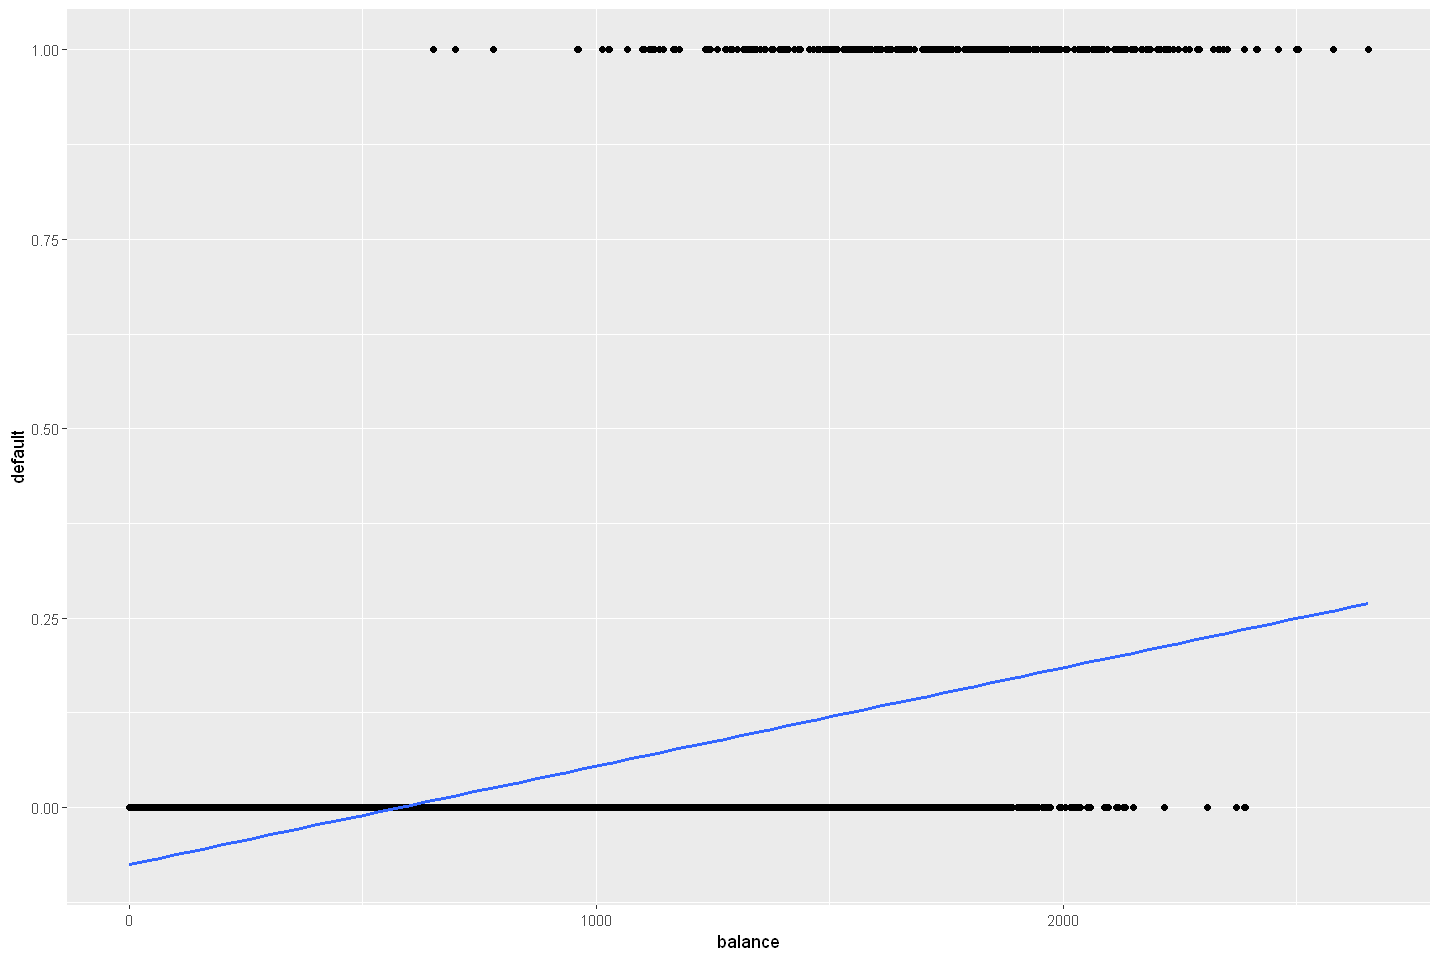

In [34]:
# visualization of the fit
ggplot(Default, aes(x = balance, y = default)) +
    geom_point() + 
    geom_smooth(method = "lm", se = FALSE)

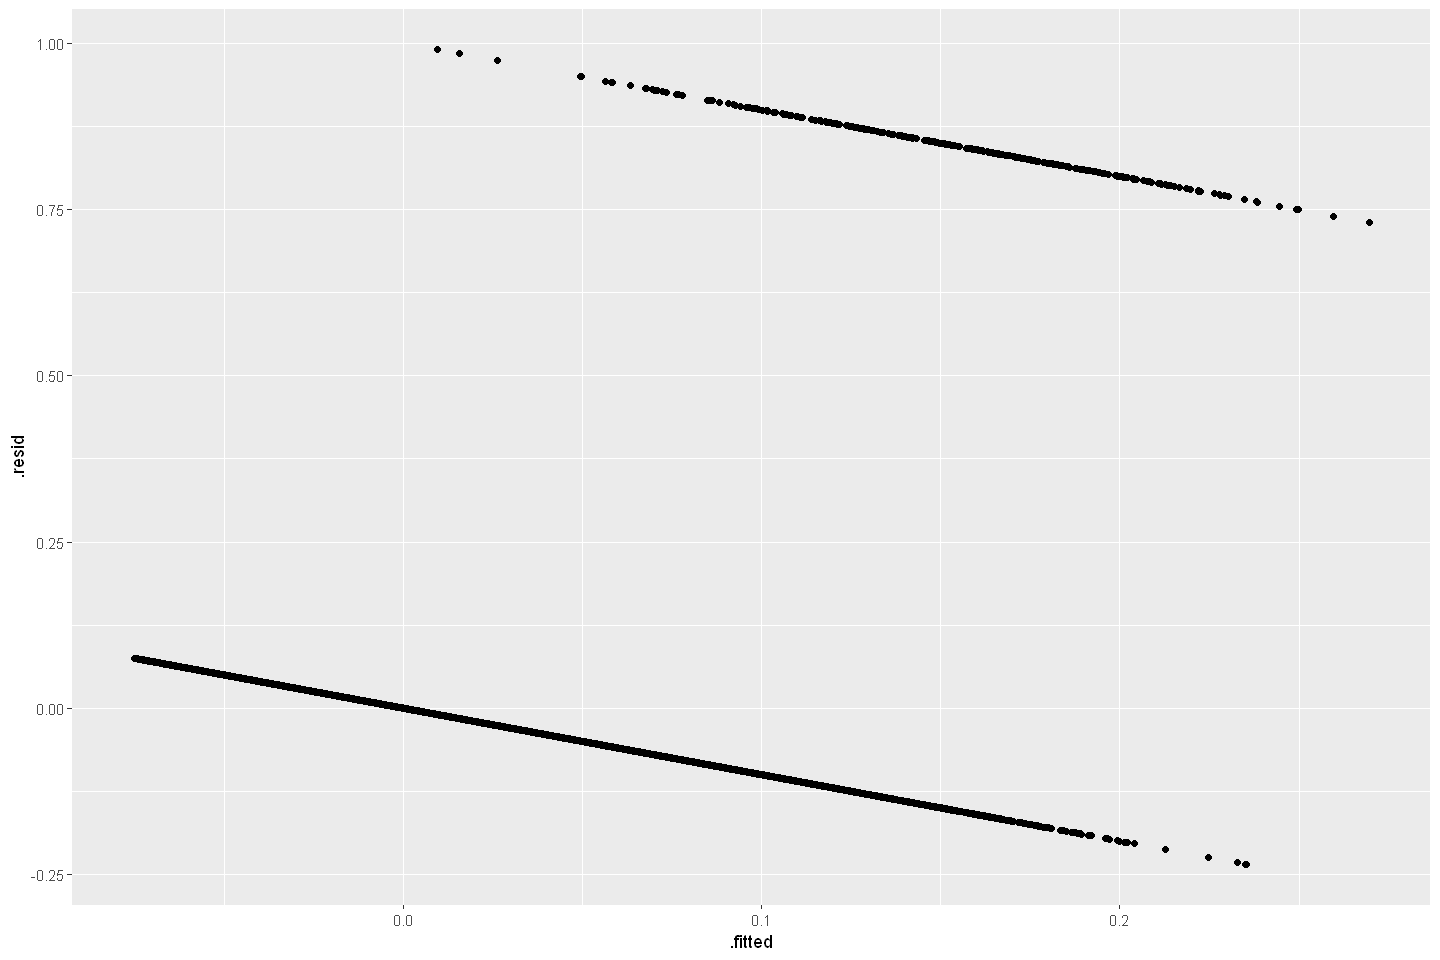

In [18]:
# Residual plot of the linear
ggplot(augment(linear), aes(x = .fitted, y = .resid)) + geom_point()

## Question 2: Fitting a logistic regression model

1. Fit a logistic regression model to this data with `balance` as the predictor and `default` as the response. Use the function `glm()` and choose `family = binomial` as an argument. Be sure to include an intercept. 
2. Create a visualization of the fit
3. Create a "value vs prediction" plot to help you decide whether the model is appropriate for the data.

Discuss with your neighbour:

- Does this model abide by the *type* of the output? 
- What would the prediction be for a $500 balance? What does that mean?


Call:
glm(formula = default ~ balance, family = "binomial", data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2697  -0.1465  -0.0589  -0.0221   3.7589  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.065e+01  3.612e-01  -29.49   <2e-16 ***
balance      5.499e-03  2.204e-04   24.95   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1596.5  on 9998  degrees of freedom
AIC: 1600.5

Number of Fisher Scoring iterations: 8


`geom_smooth()` using formula 'y ~ x'



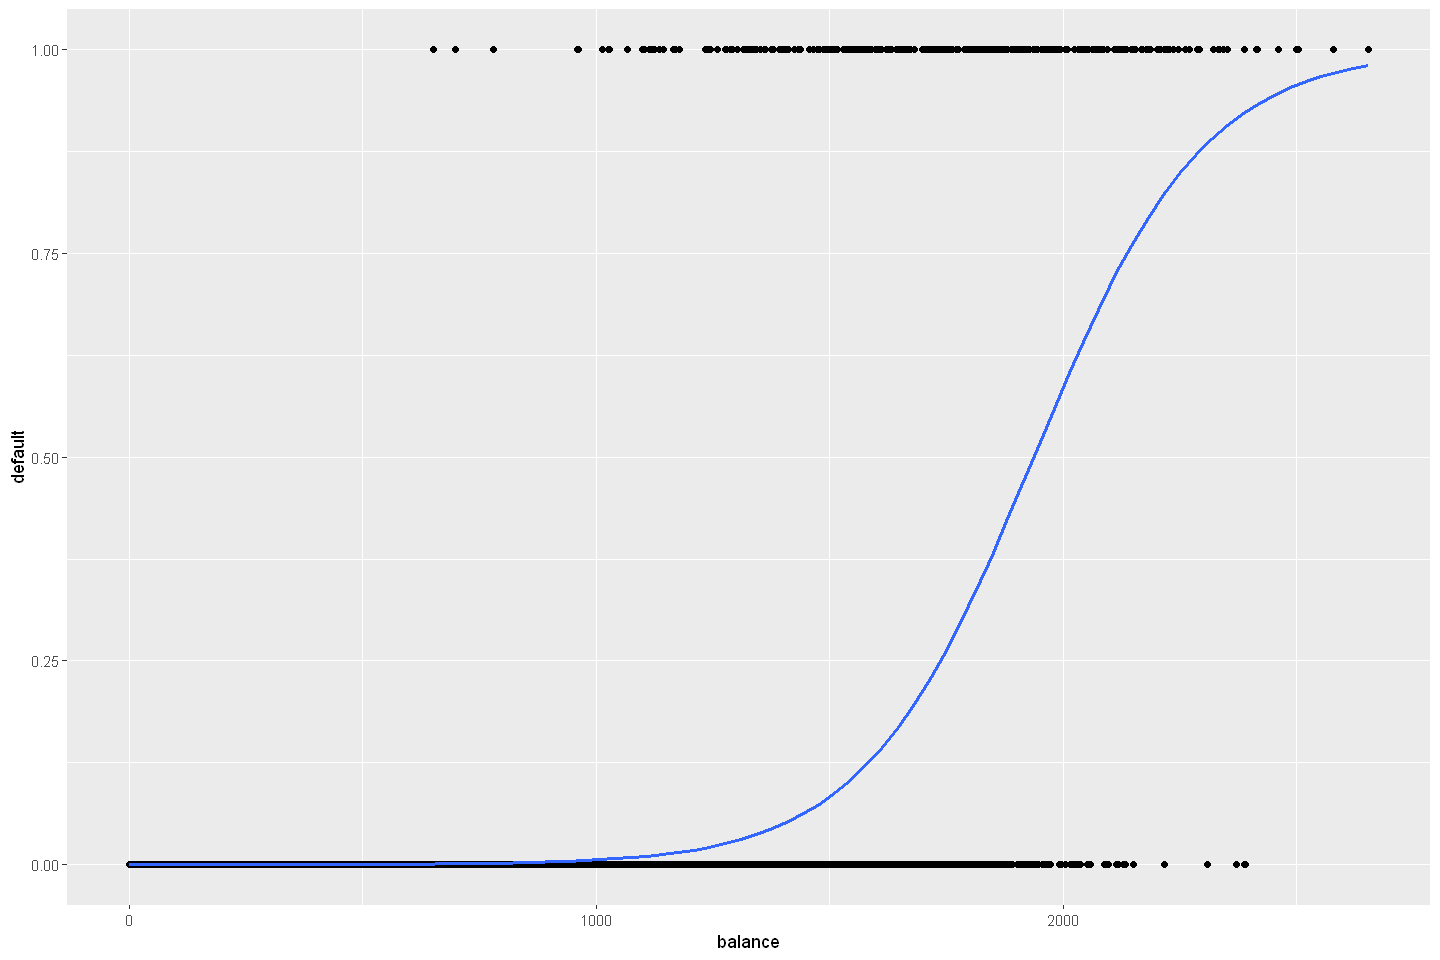

In [35]:
logit <- glm(default ~ balance, data = Default, family = "binomial")
summary(logit)

# Visualization of the logit fit
ggplot(Default, aes(x=balance, y=default)) +
  geom_point() +
  geom_smooth(method = "glm", 
    method.args = list(family = "binomial"), 
    se = FALSE) 

In [37]:
tidy(logit)
glance(logit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-10.651330614,0.3611573721,-29.49221,3.623124e-191
balance,0.005498917,0.0002203702,24.95309,1.976602e-137


null.deviance,df.null,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
2920.65,9999,-798.2258,1600.452,1614.872,1596.452,9998,10000


`geom_smooth()` using formula 'y ~ x'



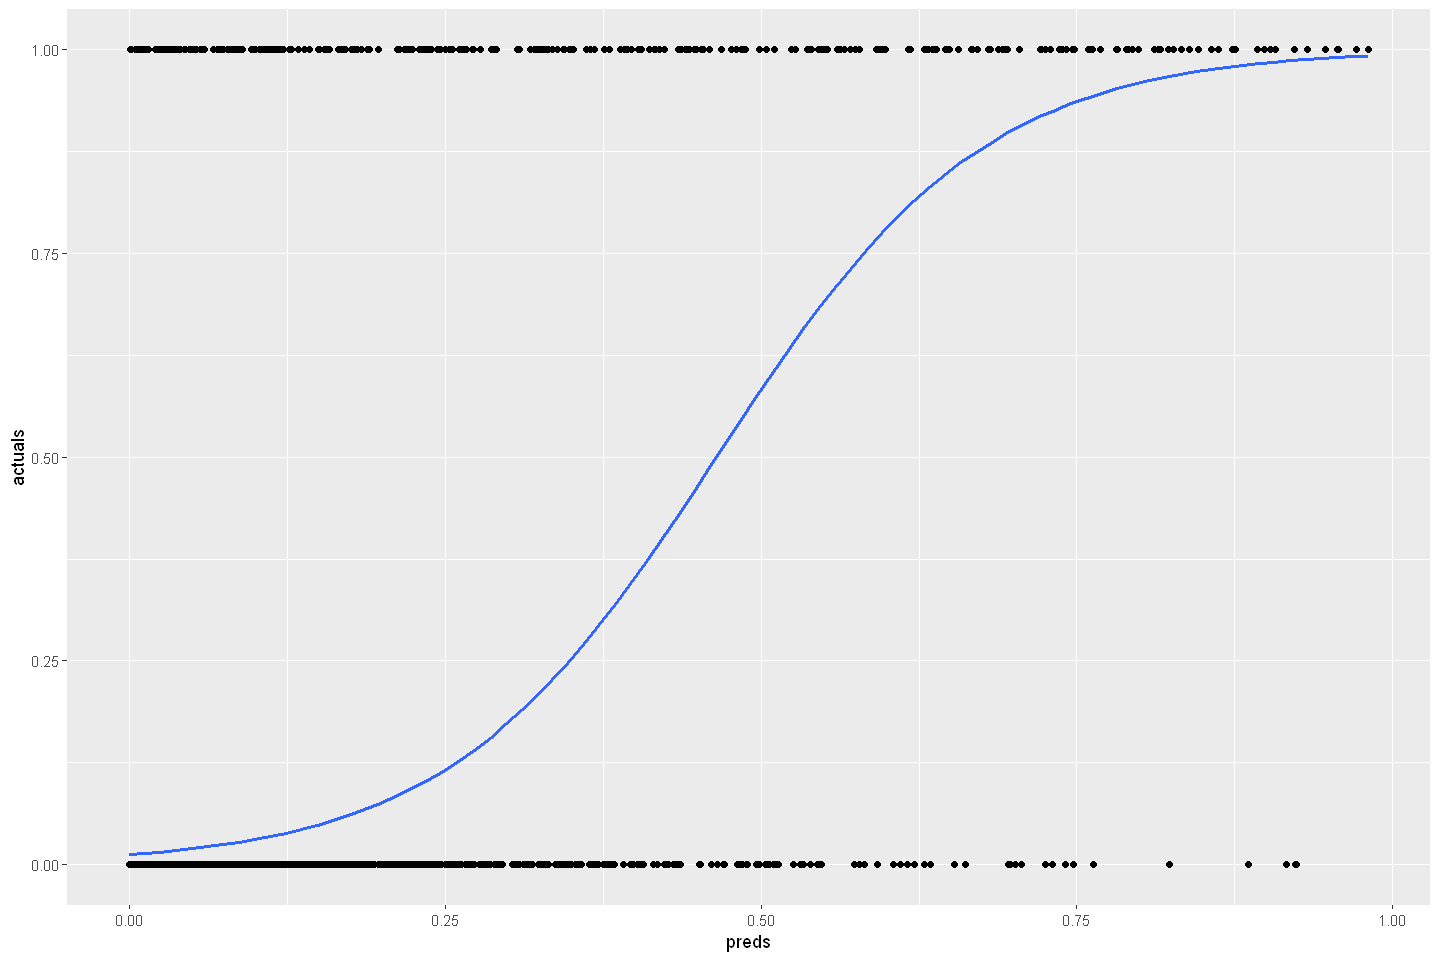

In [38]:
# Visualization of value vs predicion
# Make predictions
probabilities <- predict(logit, type = "response")
#predicted.classes <- ifelse(probabilities > 0.5, 1, 0)
#predicted.classes
plot_obj <- tibble(actuals = Default$default,
                   preds = probabilities)
#plot_obj
#mean(predicted.classes == Default$default)
ggplot(plot_obj, aes(x = preds, y = actuals)) +
     geom_point() +
     geom_smooth(method = "glm", method.args = list(family = "binomial"),
                se = FALSE)

## Question 4: Assessing the model

1. Fit a logistic regression model with an intercept and linear term, and save the residual deviance in `dev_full`

2. Fit a logistic regression model with only an intercept, and save the residual deviance in `dev_red` (note that in this case the null and the residual deviances are the equal!)

 
Perform a likelihood ratio test for: 
- intercept-only vs. intercept+linear

Discuss with your neighbour:
- is there evidence for the linear term vs intercept-only?
- is this test provided in the summary output of `glm`